# Method

--------------

for momad, we simply compute: 

    - max,
    - median of medians.

Then compute: 

    - median of medians absolute deviation (that is another median of medians but subtracting the previous median from all samples)

Then we do 

    - (max - median of medians) /  (mad * x), 
    
where x is something like 1.48

--------------

# Imports

In [3]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

rc('font', size=12)
rc('axes', titlesize=14)
rc('axes', labelsize=14)

# Recursive median of medians

In [21]:
def compute_mom(L):
    if len(L) < 10:
        L.sort()
        return L[int(len(L)/2)]
    S = []
    lIndex = 0
    
    for lIndex in range(0,len(L)-1,5):
        S.append(L[lIndex:lIndex+5])
    
    S.append(L[lIndex:])
    Meds = []
    
    for subList in S:
        Meds.append(compute_mom(subList))
    
    L2 = compute_mom(Meds)
    L1 = L3 = []
    
    for i in L:
        if i < L2:
            L1.append(i)
        if i > L2:
            L3.append(i)
    
    if len(L) < len(L1):
        return compute_mom(L1)
    
    elif len(L) > len(L1) + 1:
        return compute_mom(L3)
    
    else:
        return L2

# Downsampling

In [38]:
def downsample(array, downsampling):
    if downsampling == 0:
        return array

    series = []
    for i in range(0, len(array), downsampling):
        series.append(np.mean(array[i:i+downsampling]))
    return np.asarray(series)

# Generate SNR data

In [2]:
def init_dict_list(dictionary, key):
    try: 
        dictionary[key]
    except KeyError:
        dictionary[key] = []
    return dictionary

def noise_transients_experiment(print_log=False):
    seriess = {}
    lens = []
    maxima = {}
    moms = {}
    mads = {}
    snrs = {}
   
    n_loops = 10000
    n_samples = 2500
    counter_start = 250
    counter_end = 0
    counter_step = -25

    if print_log:
        print ("downsampling", "len", "maximum", "mom", "mad")
    for i in range(n_loops):
        array = np.random.normal(0,1,n_samples)

        for downsampling in range(counter_start, counter_end, counter_step):
            series = downsample(array, downsampling)
            
            # MAX
            maximum = np.nanmax(series)

            # MOMz
            mom = compute_mom(series)

            # MAD
            series_mad = np.abs(series - mom)
            mad = np.median(series_mad)
            
            if print_log:
                print (downsampling, lens, maximum, mom, mad)
            
            snr = (maximum-mom)/(mad*1.48)
            if snr >= 10:
                key = len(series)
                if key not in lens:
                    lens.append(key)
                init_dict_list(maxima,key)[key].append(maximum)
                init_dict_list(moms,key)[key].append(mom)
                init_dict_list(mads,key)[key].append(mad)
                init_dict_list(snrs,key)[key].append(snr)

    return n_loops, n_samples, counter_start, counter_end, counter_step, seriess, lens, maxima, moms, mads, snrs

In [3]:
n_loops, n_samples, counter_start, counter_end, counter_step, seriess, lens, maxima, moms, mads, snrs = noise_transients_experiment(False)

NameError: name 'np' is not defined

# Make figure

In [39]:
def figure_trigger_fraction_vs_N(n_loops, snrs, lens, figure_name='trigger_fraction_vs_N', extension='.pdf'):
    fig, ax = plt.subplots()

    ax.set_title("Gaussian noise data: Trigger fraction v number of samples")
    for key in lens: 
        ax.scatter(key, len(snrs[key])/n_loops, color='black')
        ax.set_xlabel("N")
        ax.set_ylabel("Trigger fraction")

    plt.savefig(figure_name + extension)

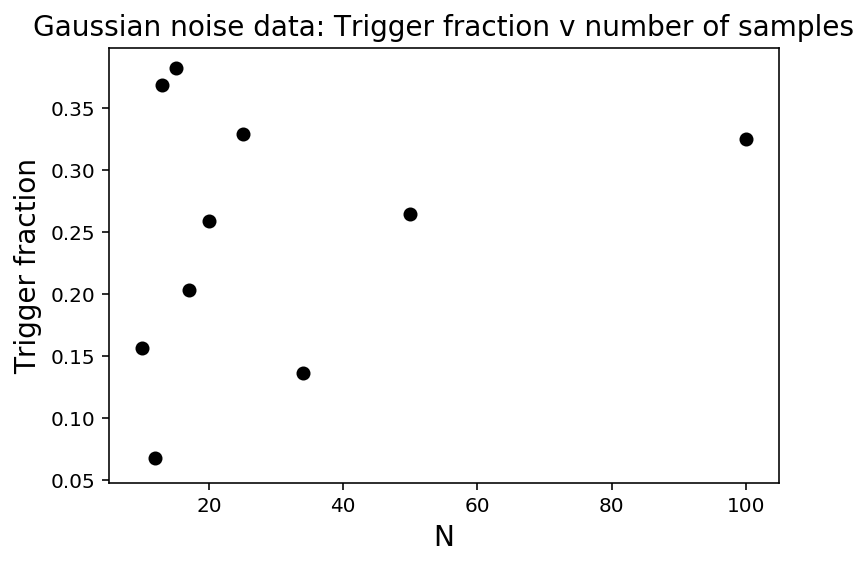

In [40]:
figure_trigger_fraction_vs_N(n_loops, snrs, lens)